In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
sns.set(rc={'figure.figsize':[12,8]})

df = pd.read_pickle('PDL1_GU_DATA.pkl')

df.head()

,id,sex,race,age,tissue,specimen,dx,subtype,primary,date_dx,anti_pdl1,outcome,date_last,pdl1_expression,pdl1_score,origin,primary_merged,fu_months,mortality_overall,mortality_cancer
0,1,Female,Causasian,45,K,rad nephrectomy,CC RCC,Renal cell carcinoma,Kidney,2020-03-24,No,NED,2020-06-04,Positive,10.0,Primary,Kidney,2.365552,AWD + NED,AWD + NED + DOC
1,2,Male,Causasian,65,P,partial penectomy,"Inv SCC, usual",Squamous cell carcinoma,Penis,2019-11-14,Yes,AWD,2020-08-04,Positive,60.0,Primary,NaN,8.673689,AWD + NED,AWD + NED + DOC
2,3,Male,Causasian,43,K,rad nephrectomy,ChrRCC,Renal cell carcinoma,Kidney,2018-03-02,Yes,AWD,2020-09-04,Negative,7.0,Primary,Kidney,30.127929,AWD + NED,AWD + NED + DOC
3,4,Male,African-American,69,K,Bone (L5) excision,Mets CC RCC,Renal cell carcinoma,Kidney,2019-11-04,Yes,AWD,2020-09-16,Positive,40.0,Metastatic,Kidney,10.414998,AWD + NED,AWD + NED + DOC
4,5,Female,African-American,79,K,Needle biopsy,CC RCC,Renal cell carcinoma,Kidney,2020-03-24,No,AWD,2020-05-15,Negative,4.0,Primary,Kidney,1.708454,AWD + NED,AWD + NED + DOC


# PD-L1 expression

## vs patient´s sex

In [2]:
tbl = pd.crosstab(df['sex'], df['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
sex,,
Female,11,17
Male,14,39


In [3]:
# P value
scipy.stats.chi2_contingency(tbl)[1]

0.34736167972591925

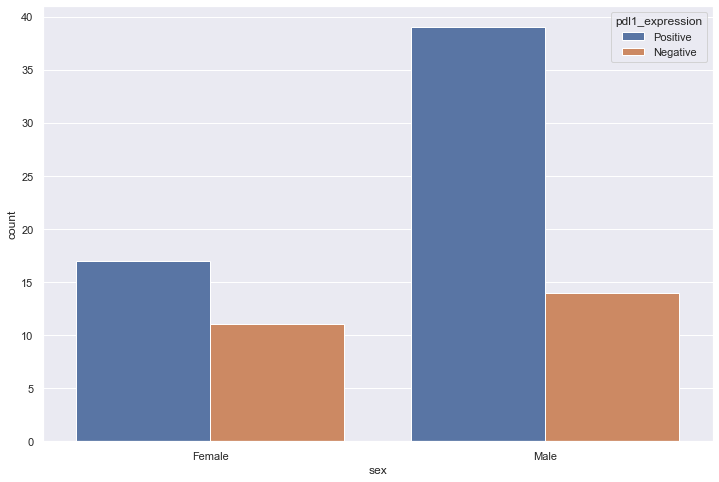

In [4]:
ax = sns.countplot(x='sex', hue='pdl1_expression', data=df)

## vs patient's race

In [5]:
tbl = pd.crosstab(df['race'], df['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
race,,
African-American,9,9
Causasian,16,47


In [6]:
# P value
scipy.stats.chi2_contingency(tbl)[1]

0.08846118302310373

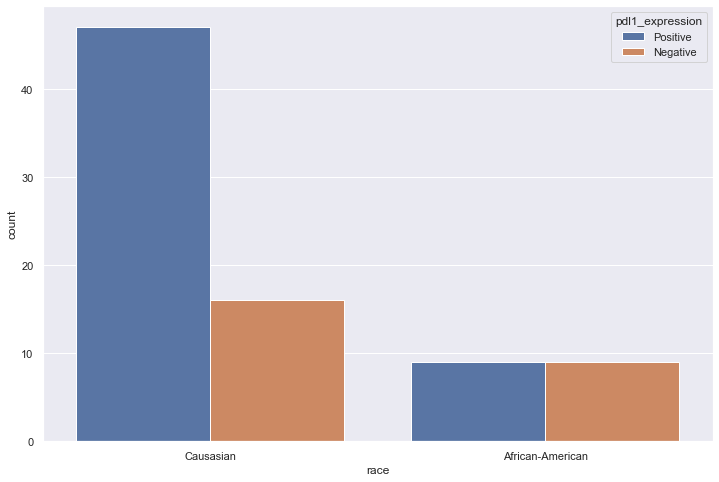

In [7]:
ax = sns.countplot(x='race', hue='pdl1_expression', data=df)

## vs patient's age

In [8]:
df.groupby('pdl1_expression')['age'].describe().round()

,count,mean,std,min,25%,50%,75%,max
pdl1_expression,,,,,,,,
Negative,25.0,69.0,8.0,43.0,65.0,70.0,73.0,83.0
Positive,56.0,66.0,11.0,38.0,59.0,66.0,74.0,91.0


In [9]:
# P value
scipy.stats.mannwhitneyu(*[data['age'].values for name, data in df.groupby('pdl1_expression')])[1]

0.046134742729825096

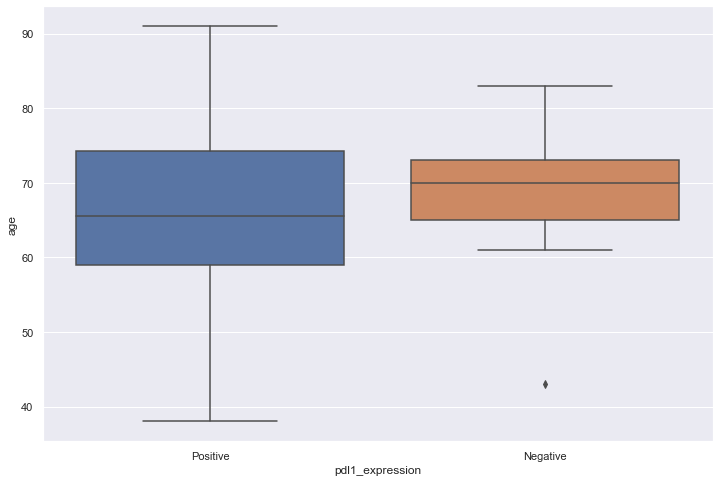

In [10]:
ax = sns.boxplot(x='pdl1_expression', y='age', data=df)

## vs site of primary tumor

In [11]:
tbl = pd.crosstab(df['primary'], df['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
primary,,
Bladder,9,31
Kidney,9,19
Penis,1,2
Prostate,1,0
Ureter,4,3
Urethra,1,1


In [12]:
# P value
scipy.stats.chi2_contingency(tbl)[1]

0.2881589587407437

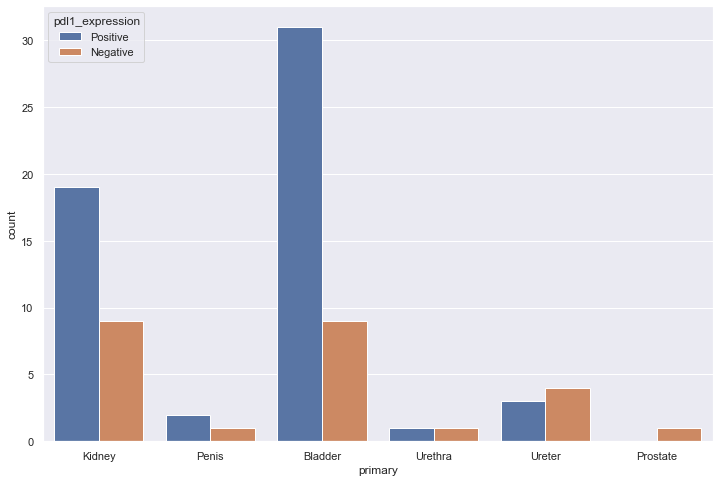

In [13]:
ax = sns.countplot(x='primary', hue='pdl1_expression', data=df)

## vs tissue origin

In [14]:
tbl = pd.crosstab(df['origin'], df['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
origin,,
Metastatic,5,13
Primary,20,43


In [15]:
# P value
scipy.stats.chi2_contingency(tbl)[1]

0.9743581259953441

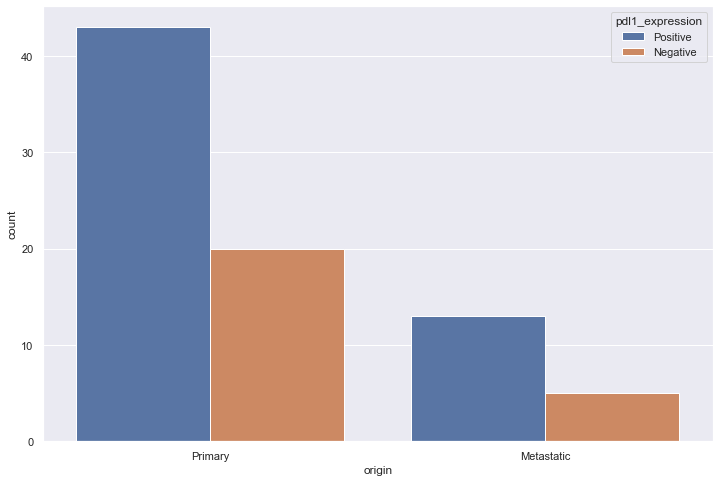

In [16]:
ax = sns.countplot(x='origin', hue='pdl1_expression', data=df)

## vs outcome

In [17]:
tbl = pd.crosstab(df['outcome'], df['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
outcome,,
AWD,18,41
DOC,0,2
DOD,3,5
NED,4,8


In [18]:
# P value
scipy.stats.chi2_contingency(tbl)[1]

0.7781047523130602

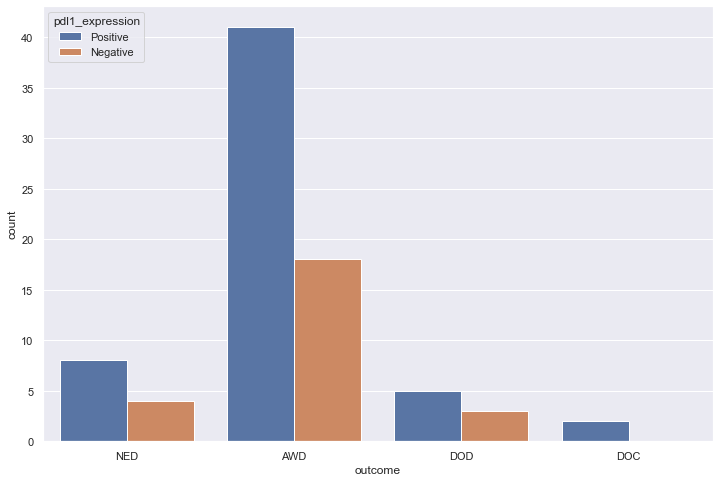

In [19]:
ax = sns.countplot(x='outcome', hue='pdl1_expression', data=df)

## vs overall mortality

In [20]:
tbl = pd.crosstab(df['mortality_overall'], df['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
mortality_overall,,
AWD + NED,22,49
DOD + DOC,3,7


In [21]:
# P value
scipy.stats.chi2_contingency(tbl)[1]

0.7623406067048141

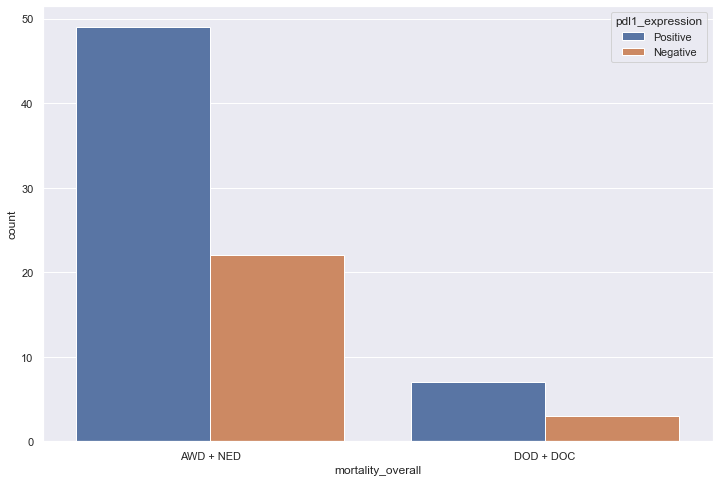

In [22]:
ax = sns.countplot(x='mortality_overall', hue='pdl1_expression', data=df)

## vs cancer-related mortality

In [23]:
tbl = pd.crosstab(df['mortality_cancer'], df['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
mortality_cancer,,
AWD + NED + DOC,22,51
DOD,3,5


In [24]:
# P value
scipy.stats.chi2_contingency(tbl)[1]

0.9801478603509888

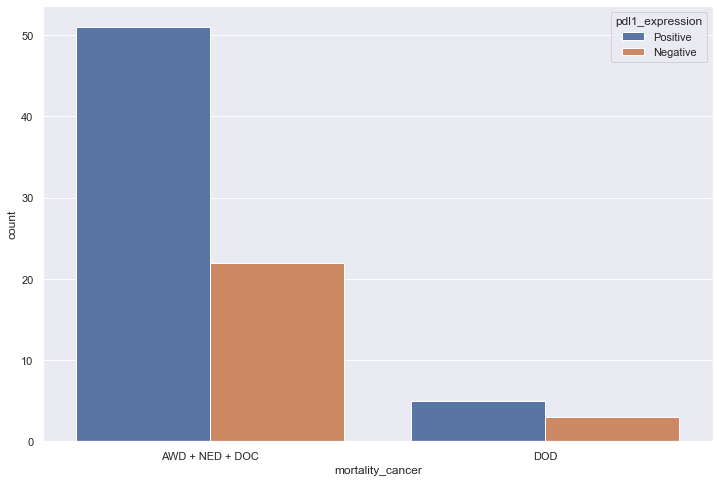

In [25]:
ax = sns.countplot(x='mortality_cancer', hue='pdl1_expression', data=df)

## vs site of primary tumor and tissue origin

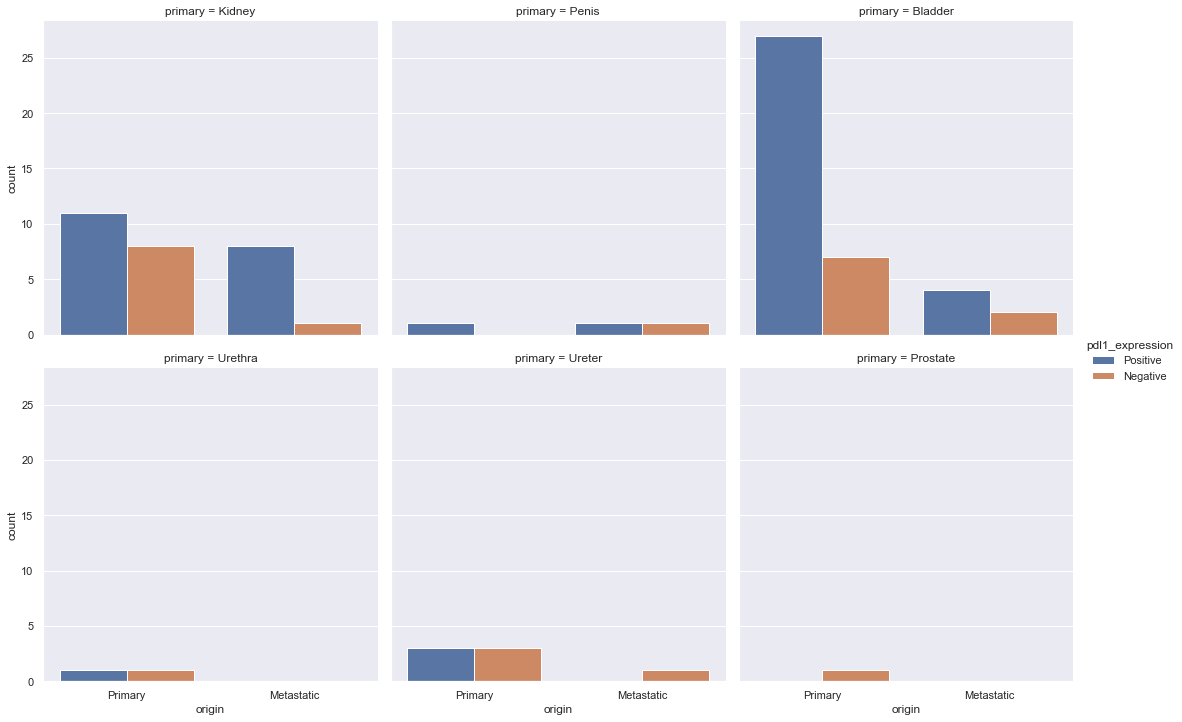

In [26]:
ax = sns.catplot(x='origin', hue='pdl1_expression', col='primary', data=df, kind='count', col_wrap=3)

In [27]:
df.groupby(['origin','primary'])['pdl1_expression'].value_counts().to_frame()

pdl1_expression
origin     primary  pdl1_expression                 
Metastatic Bladder  Positive                       4
                    Negative                       2
           Kidney   Positive                       8
                    Negative                       1
           Penis    Negative                       1
                    Positive                       1
           Ureter   Negative                       1
Primary    Bladder  Positive                      27
                    Negative                       7
           Kidney   Positive                      11
                    Negative                       8
           Penis    Positive                       1
           Prostate Negative                       1
           Ureter   Negative                       3
                    Positive                       3
           Urethra  Negative                       1
                    Positive                       1

### Primary: Kidney

In [28]:
kidney = df.query('primary == "Kidney"')
tbl = pd.crosstab(kidney['origin'], kidney['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
origin,,
Metastatic,1,8
Primary,8,11


In [29]:
# P value
scipy.stats.chi2_contingency(tbl)[1]

0.22749610574137769

### Primary: Penis

In [30]:
penis = df.query('primary == "Penis"')
tbl = pd.crosstab(penis['origin'], penis['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
origin,,
Metastatic,1,1
Primary,0,1


In [31]:
# P value
scipy.stats.chi2_contingency(tbl)[1]

0.665005542102029

### Primary: Bladder

In [32]:
bladder = df.query('primary == "Bladder"')
tbl = pd.crosstab(bladder['origin'], bladder['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
origin,,
Metastatic,2,4
Primary,7,27


In [33]:
# P value
scipy.stats.chi2_contingency(tbl)[1]

0.8736207128285849

### Primary: Urethra

In [34]:
urethra = df.query('primary == "Urethra"')
tbl = pd.crosstab(urethra['origin'], urethra['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
origin,,
Primary,1,1


### Primary: Ureter

In [35]:
ureter = df.query('primary == "Ureter"')
tbl = pd.crosstab(ureter['origin'], ureter['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
origin,,
Metastatic,1,0
Primary,3,3


In [36]:
# P value
scipy.stats.chi2_contingency(tbl)[1]

0.8761099605196068

### Primary: Prostate

In [37]:
prostate = df.query('primary == "Prostate"')
tbl = pd.crosstab(prostate['origin'], prostate['pdl1_expression'])
tbl

pdl1_expression,Negative
origin,
Primary,1


## vs subtype

### All subtypes

In [38]:
tbl = pd.crosstab(df['subtype'], df['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
subtype,,
Adenocarcinoma,1,0
Neuroendocrine carcinoma,0,3
Renal cell carcinoma,7,9
Squamous cell carcinoma,1,5
Urothelial carcinoma,16,31


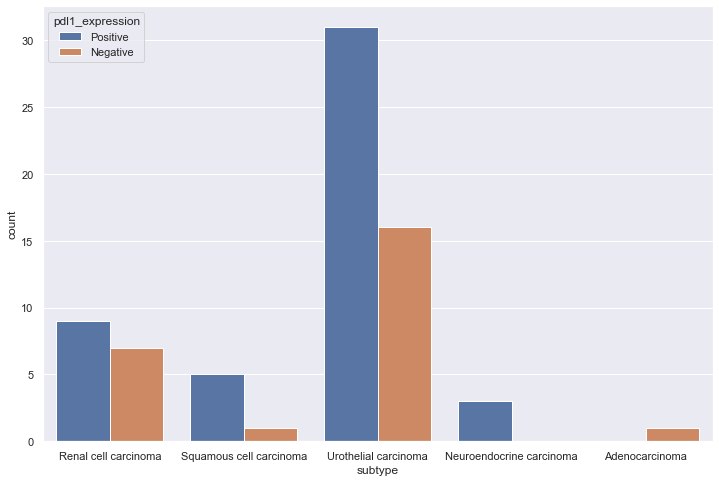

In [39]:
ax = sns.countplot(x='subtype', hue='pdl1_expression', data=df)

In [40]:
# P value
scipy.stats.chi2_contingency(tbl)[1]

0.2926164260972825

For the following analyses, prostate and penis were excluded. Prostate was excluded because it included only 1 case. Penis was excluded because all cases corresponded to the same histologic subtype (SCC). To increase the number of cases, we merged bladder, ureter and urethra into urinry tract

### Kidney

In [41]:
df_kidney = df.query('primary_merged == "Kidney"')
df_kidney['subtype'].value_counts().to_frame()

,subtype
Renal cell carcinoma,16
Urothelial carcinoma,6


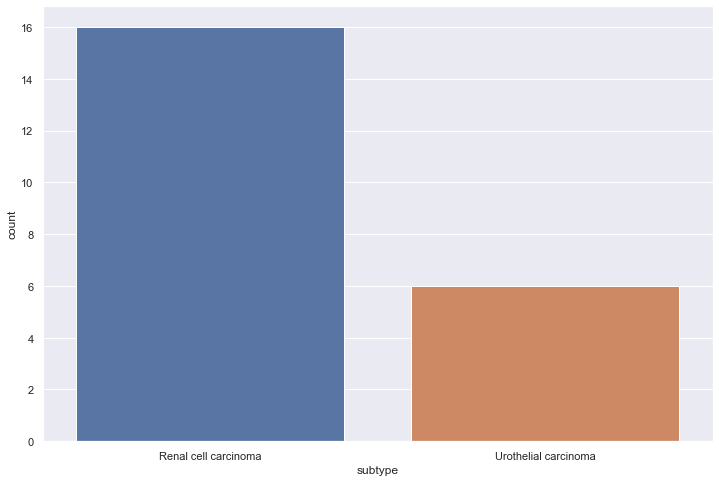

In [42]:
ax = sns.countplot(x='subtype', data=df_kidney)

In [43]:
tbl = pd.crosstab(df_kidney['subtype'], df_kidney['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
subtype,,
Renal cell carcinoma,7,9
Urothelial carcinoma,2,4


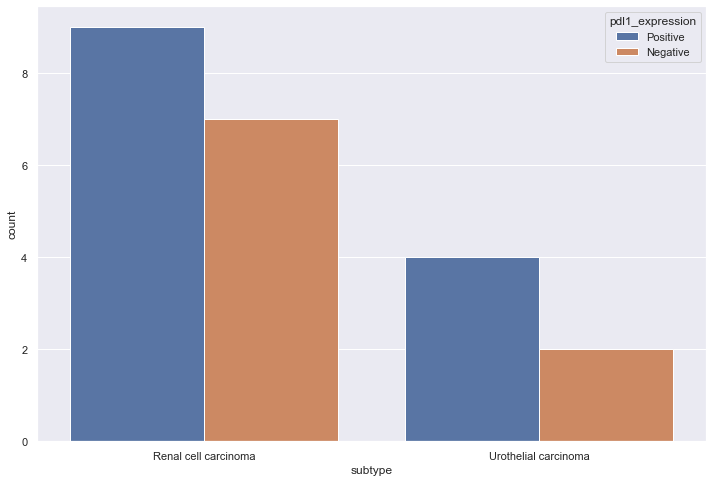

In [44]:
ax = sns.countplot(x='subtype', hue='pdl1_expression', data=df_kidney)

In [45]:
# P value
scipy.stats.chi2_contingency(tbl)[1]

0.9646994803686628

### Urinary tract (bladder, ureter, urethra)

In [46]:
df_ut = df.query('primary_merged == "Urinary tract"')
df_ut['subtype'].value_counts().to_frame()

,subtype
Urothelial carcinoma,41
Neuroendocrine carcinoma,3
Squamous cell carcinoma,3


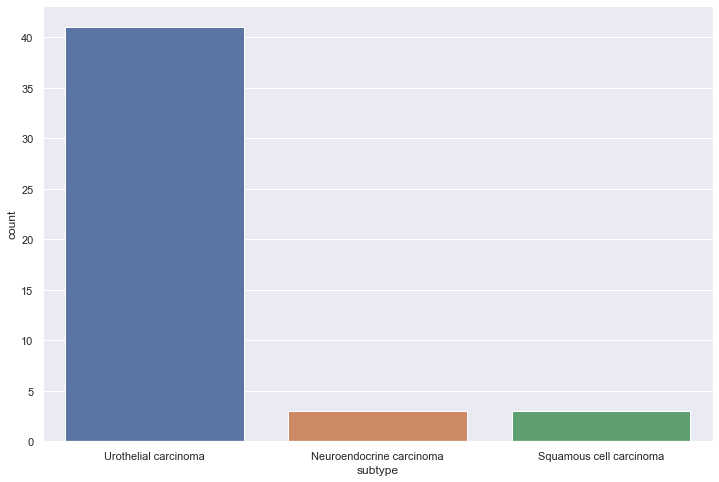

In [47]:
ax = sns.countplot(x='subtype', data=df_ut)

In [48]:
tbl = pd.crosstab(df_ut['subtype'], df_ut['pdl1_expression'])
tbl

pdl1_expression,Negative,Positive
subtype,,
Neuroendocrine carcinoma,0,3
Squamous cell carcinoma,0,3
Urothelial carcinoma,14,27


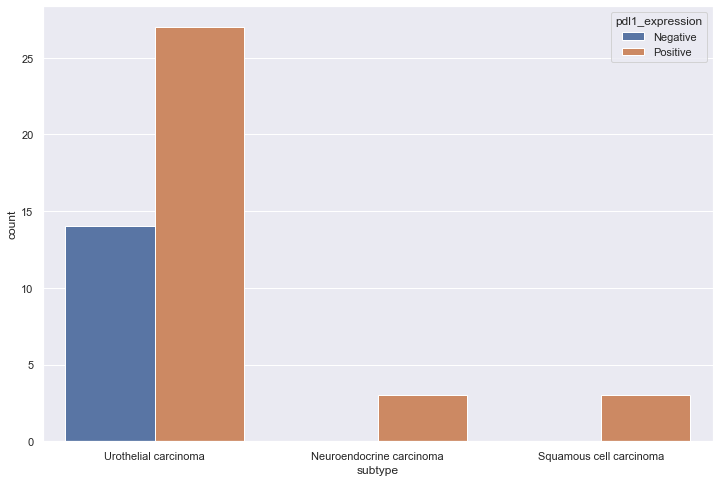

In [49]:
ax = sns.countplot(x='subtype', hue='pdl1_expression', data=df_ut)

In [50]:
scipy.stats.chi2_contingency(tbl)[1]

0.2324732662711429

# PD-L1 score

## vs patient's age

In [51]:
rho, p = scipy.stats.spearmanr(df['age'], df['pdl1_score'])
print('Correlation coefficient: {}.\nP value: {}'.format(rho, p))

Correlation coefficient: -0.11071899540702136.
P value: 0.3251093721876065


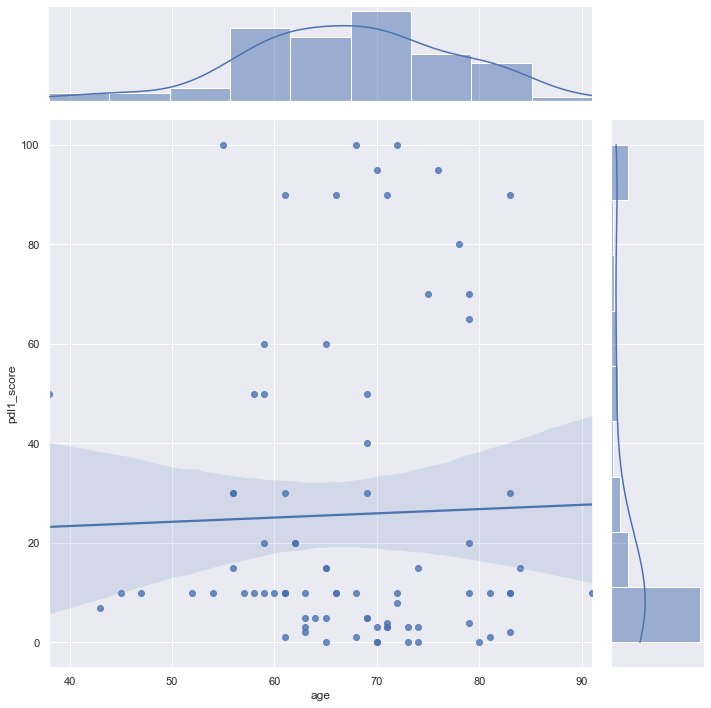

In [52]:
ax = sns.jointplot(x='age', y='pdl1_score', data=df, kind='reg', height=10)

## vs patient's sex

In [53]:
df.groupby('sex')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,28.0,25.0,32.0,0.0,4.0,10.0,35.0,100.0
Male,53.0,26.0,31.0,0.0,7.0,10.0,30.0,100.0


In [54]:
# P value
scipy.stats.mannwhitneyu(*[data['pdl1_score'].values for name, data in df.groupby('sex')])[1]

0.2787432480620058

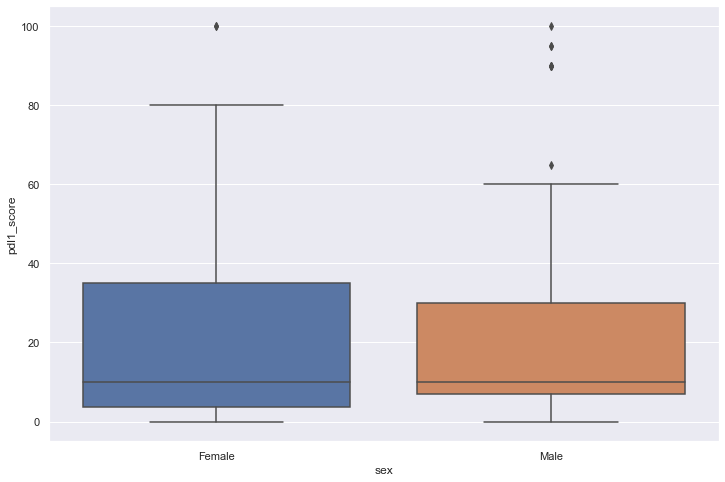

In [55]:
ax = sns.boxplot(x='sex', y='pdl1_score', data=df)

## vs patient's race

In [56]:
df.groupby('race')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
African-American,18.0,17.0,25.0,0.0,3.0,9.0,15.0,100.0
Causasian,63.0,28.0,32.0,0.0,6.0,10.0,50.0,100.0


In [57]:
# P value
scipy.stats.mannwhitneyu(*[data['pdl1_score'].values for name, data in df.groupby('race')])[1]

0.06871559306968125

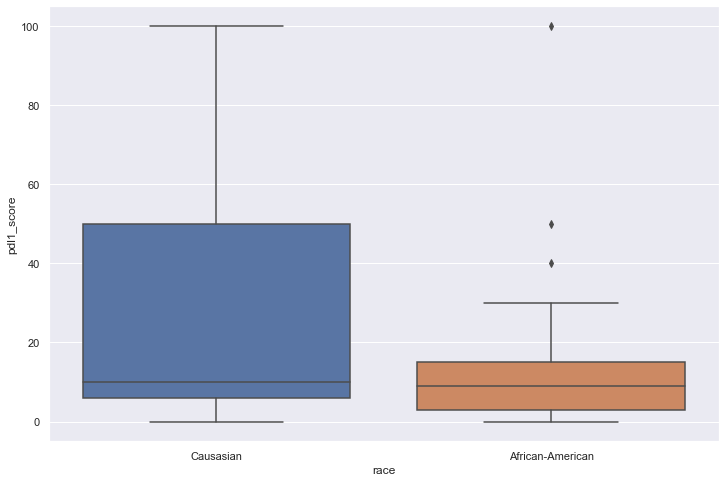

In [58]:
ax = sns.boxplot(x='race', y='pdl1_score', data=df)

## vs site of primary tumor

In [59]:
df.groupby('primary')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
primary,,,,,,,,
Bladder,40.0,31.0,36.0,0.0,10.0,10.0,61.0,100.0
Kidney,28.0,22.0,24.0,0.0,5.0,10.0,30.0,90.0
Penis,3.0,38.0,29.0,5.0,28.0,50.0,55.0,60.0
Prostate,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Ureter,7.0,14.0,19.0,0.0,1.0,3.0,20.0,50.0
Urethra,2.0,5.0,7.0,0.0,2.0,5.0,8.0,10.0


In [60]:
# P value
scipy.stats.kruskal(*[data['pdl1_score'].values for name, data in df.groupby('primary')])[1]

0.18413190520060063

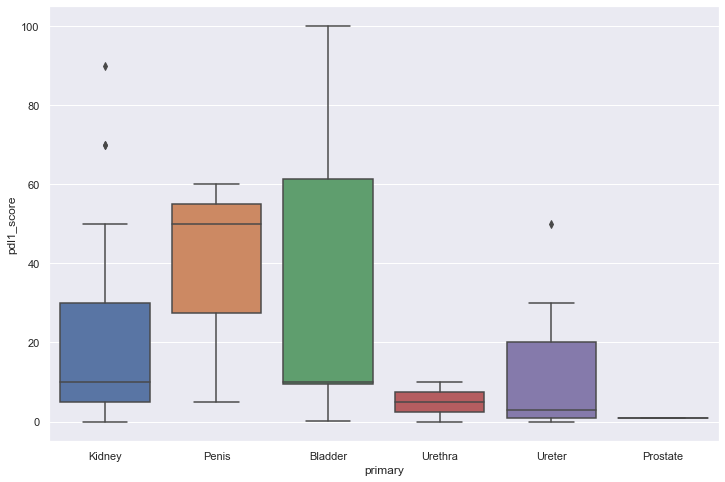

In [61]:
ax = sns.boxplot(x='primary', y='pdl1_score', data=df)

## vs tissue origin

In [62]:
df.groupby('origin')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Metastatic,18.0,25.0,23.0,3.0,6.0,15.0,48.0,70.0
Primary,63.0,26.0,33.0,0.0,4.0,10.0,30.0,100.0


In [63]:
# P value
scipy.stats.mannwhitneyu(*[data['pdl1_score'].values for name, data in df.groupby('origin')])[1]

0.20281490134385516

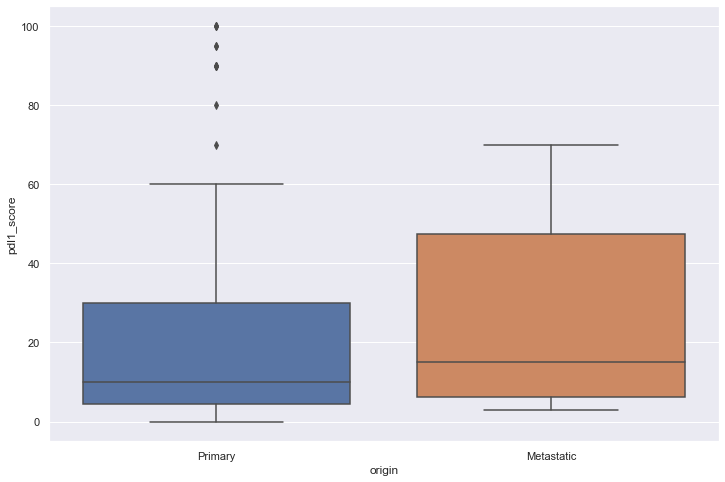

In [64]:
ax = sns.boxplot(x='origin', y='pdl1_score', data=df)

## vs outcome

In [65]:
df.groupby('outcome')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
outcome,,,,,,,,
AWD,59.0,26.0,30.0,0.0,5.0,10.0,30.0,100.0
DOC,2.0,92.0,4.0,90.0,91.0,92.0,94.0,95.0
DOD,8.0,23.0,35.0,0.0,3.0,10.0,20.0,100.0
NED,12.0,15.0,17.0,0.0,3.0,10.0,12.0,50.0


In [66]:
# P value
scipy.stats.kruskal(*[data['pdl1_score'].values for name, data in df.groupby('outcome')])[1]

0.09436291313480685

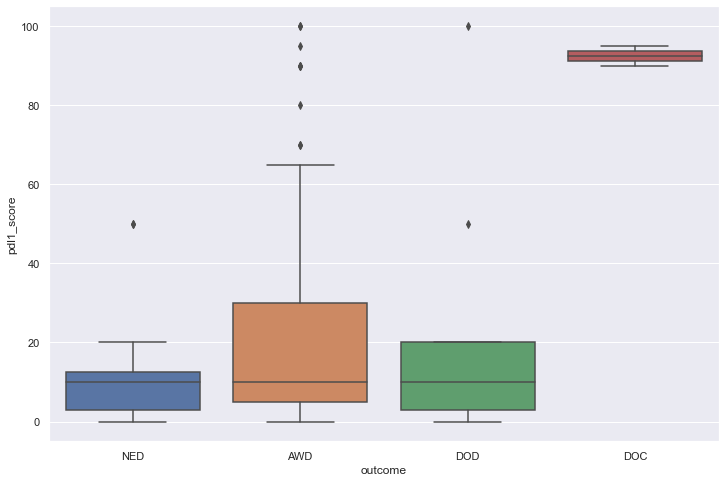

In [67]:
ax = sns.boxplot(x='outcome', y='pdl1_score', data=df)

## Overall mortality

In [68]:
df.groupby('mortality_overall')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
mortality_overall,,,,,,,,
AWD + NED,71.0,24.0,29.0,0.0,5.0,10.0,30.0,100.0
DOD + DOC,10.0,37.0,43.0,0.0,6.0,10.0,80.0,100.0


In [69]:
# P value
scipy.stats.mannwhitneyu(*[data['pdl1_score'].values for name, data in df.groupby('mortality_overall')])[1]

0.37764515399406684

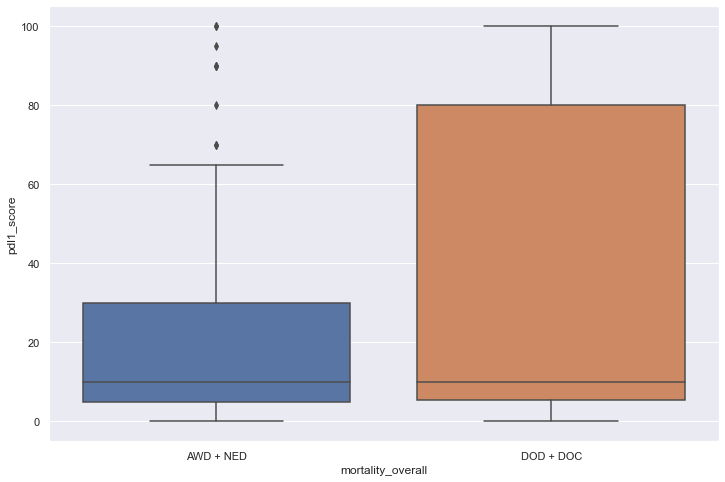

In [70]:
ax = sns.boxplot(x='mortality_overall', y='pdl1_score', data=df)

## Cancer-related mortality

In [71]:
df.groupby('mortality_cancer')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
mortality_cancer,,,,,,,,
AWD + NED + DOC,73.0,26.0,31.0,0.0,5.0,10.0,30.0,100.0
DOD,8.0,23.0,35.0,0.0,3.0,10.0,20.0,100.0


In [72]:
# P value
scipy.stats.mannwhitneyu(*[data['pdl1_score'].values for name, data in df.groupby('mortality_cancer')])[1]

0.22385675223845497

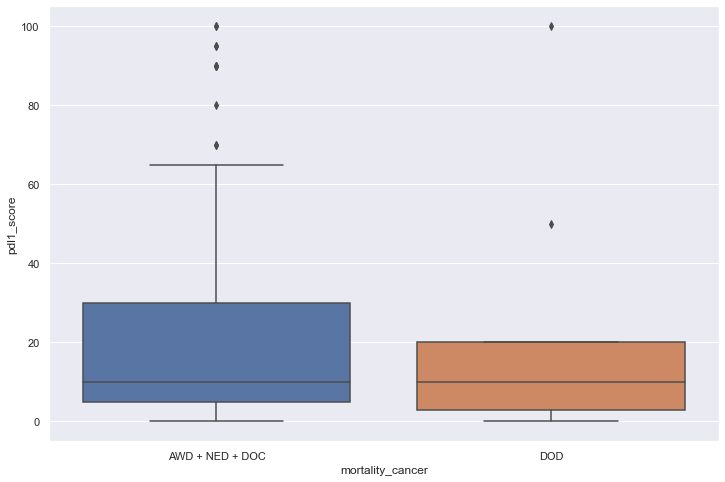

In [73]:
ax = sns.boxplot(x='mortality_cancer', y='pdl1_score', data=df)

## vs site of primary tumor and tissue origin

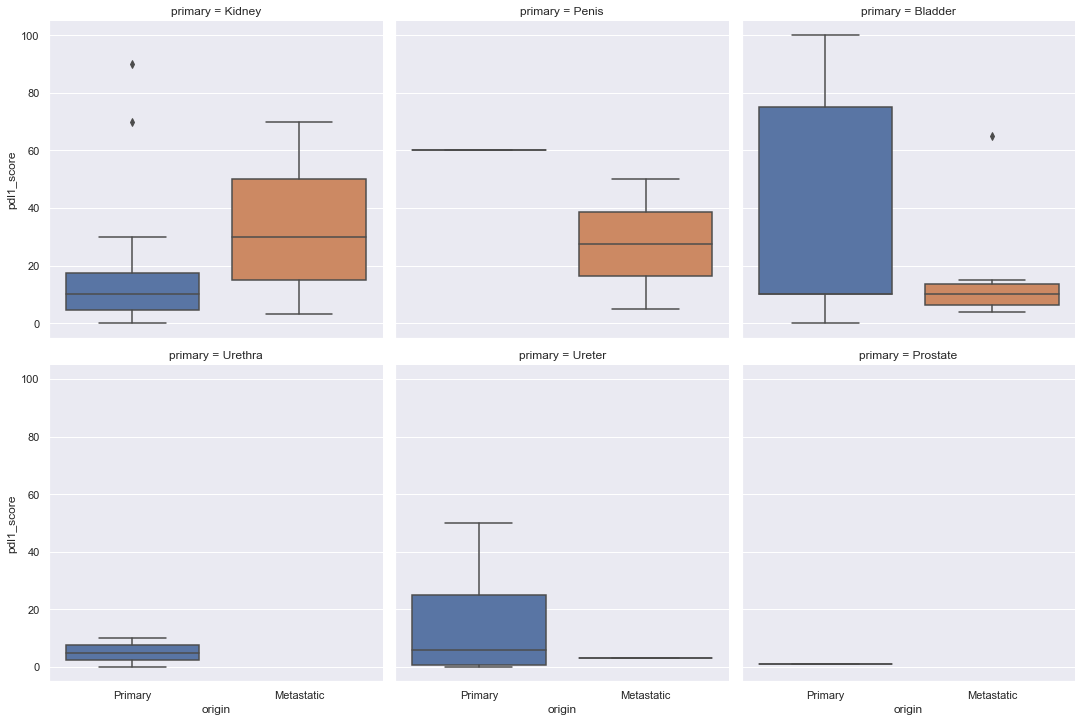

In [74]:
ax = sns.catplot(x='origin', y='pdl1_score', col='primary', kind='box', data=df, col_wrap=3)

In [75]:
df.groupby(['origin','primary'])['pdl1_score'].describe().round()

count  mean   std   min   25%   50%   75%    max
origin     primary                                                   
Metastatic Bladder     6.0  18.0  23.0   4.0   6.0  10.0  14.0   65.0
           Kidney      9.0  32.0  22.0   3.0  15.0  30.0  50.0   70.0
           Penis       2.0  28.0  32.0   5.0  16.0  28.0  39.0   50.0
           Ureter      1.0   3.0   NaN   3.0   3.0   3.0   3.0    3.0
Primary    Bladder    34.0  34.0  38.0   0.0  10.0  10.0  75.0  100.0
           Kidney     19.0  17.0  24.0   0.0   4.0  10.0  18.0   90.0
           Penis       1.0  60.0   NaN  60.0  60.0  60.0  60.0   60.0
           Prostate    1.0   1.0   NaN   1.0   1.0   1.0   1.0    1.0
           Ureter      6.0  15.0  20.0   0.0   0.0   6.0  25.0   50.0
           Urethra     2.0   5.0   7.0   0.0   2.0   5.0   8.0   10.0

### Primary: Kidney

In [76]:
kidney.groupby('origin')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Metastatic,9.0,32.0,22.0,3.0,15.0,30.0,50.0,70.0
Primary,19.0,17.0,24.0,0.0,4.0,10.0,18.0,90.0


In [77]:
# P value
scipy.stats.mannwhitneyu(*[data['pdl1_score'].values for name, data in kidney.groupby('origin')])[1]

0.02115143001053707

### Primary: Penis

In [78]:
penis.groupby('origin')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Metastatic,2.0,28.0,32.0,5.0,16.0,28.0,39.0,50.0
Primary,1.0,60.0,NaN,60.0,60.0,60.0,60.0,60.0


In [79]:
# P value
scipy.stats.mannwhitneyu(*[data['pdl1_score'].values for name, data in penis.groupby('origin')])[1]

0.27014568730370997

### Primary: Bladder

In [80]:
bladder.groupby('origin')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Metastatic,6.0,18.0,23.0,4.0,6.0,10.0,14.0,65.0
Primary,34.0,34.0,38.0,0.0,10.0,10.0,75.0,100.0


In [81]:
# P value
scipy.stats.mannwhitneyu(*[data['pdl1_score'].values for name, data in bladder.groupby('origin')])[1]

0.25599375807373154

### Primary: Urethra

In [82]:
urethra.groupby('origin')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Primary,2.0,5.0,7.0,0.0,2.0,5.0,8.0,10.0


In [83]:
# P value

### Primary: Ureter

In [84]:
ureter.groupby('origin')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Metastatic,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
Primary,6.0,15.0,20.0,0.0,0.0,6.0,25.0,50.0


In [85]:
# P value
scipy.stats.mannwhitneyu(*[data['pdl1_score'].values for name, data in ureter.groupby('origin')])[1]

0.4004190898534975

### Primary: Prostate

In [86]:
prostate.groupby('origin')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Primary,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0


In [87]:
# P value

## vs subtype

In [88]:
df.groupby('subtype')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
subtype,,,,,,,,
Adenocarcinoma,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Neuroendocrine carcinoma,3.0,10.0,0.0,10.0,10.0,10.0,10.0,10.0
Renal cell carcinoma,16.0,16.0,17.0,0.0,4.0,10.0,22.0,50.0
Squamous cell carcinoma,6.0,38.0,34.0,5.0,11.0,32.0,58.0,90.0
Urothelial carcinoma,47.0,26.0,33.0,0.0,4.0,10.0,30.0,100.0


In [89]:
# P value
scipy.stats.kruskal(*[data['pdl1_score'].values for name, data in df.groupby('subtype')], nan_policy='omit')[1]

0.35529917564461627

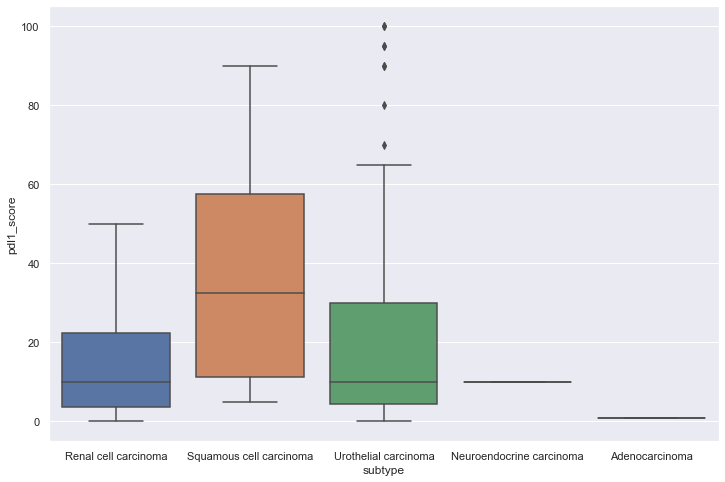

In [90]:
ax = sns.boxplot(x='subtype', y='pdl1_score', data=df)

### Kidney

In [91]:
df_kidney.groupby('subtype')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
subtype,,,,,,,,
Renal cell carcinoma,16.0,16.0,17.0,0.0,4.0,10.0,22.0,50.0
Urothelial carcinoma,6.0,19.0,26.0,0.0,6.0,10.0,18.0,70.0


In [92]:
# P value
scipy.stats.kruskal(*[data['pdl1_score'].values for name, data in df_kidney.groupby('subtype')], nan_policy='omit')[1]

0.8526197295111554

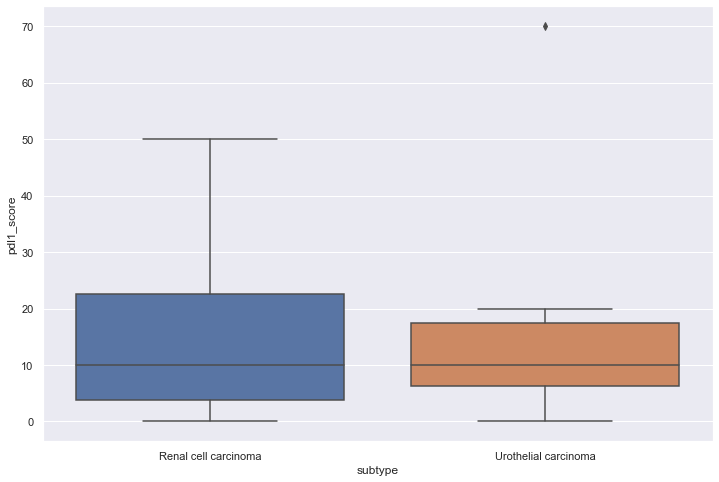

In [93]:
ax = sns.boxplot(x='subtype', y='pdl1_score', data=df_kidney)

### Urinary tract (bladder, ureter, urethra)

In [94]:
df_ut.groupby('subtype')['pdl1_score'].describe().round()

,count,mean,std,min,25%,50%,75%,max
subtype,,,,,,,,
Neuroendocrine carcinoma,3.0,10.0,0.0,10.0,10.0,10.0,10.0,10.0
Squamous cell carcinoma,3.0,38.0,45.0,10.0,12.0,15.0,52.0,90.0
Urothelial carcinoma,41.0,27.0,34.0,0.0,4.0,10.0,30.0,100.0


In [95]:
# P value
scipy.stats.kruskal(*[data['pdl1_score'].values for name, data in df_ut.groupby('subtype')], nan_policy='omit')[1]

0.5840176802291541

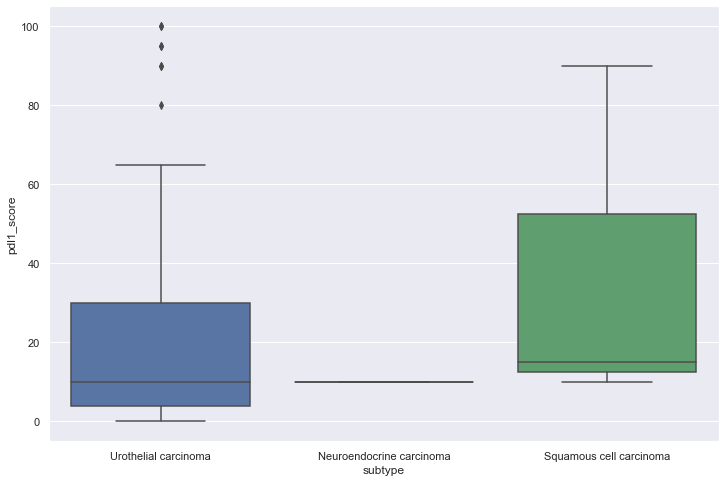

In [96]:
ax = sns.boxplot(x='subtype', y='pdl1_score', data=df_ut)